In [1]:
import numpy as np

In [2]:
with open('day8.txt', 'r') as f:
    data = f.readlines()

In [3]:
# Represent the forest as a 2D numpy array using list comprehension
forest = np.array([[int(x) for x in y.strip()] for y in data])
forest

array([[0, 0, 2, ..., 0, 2, 2],
       [1, 2, 1, ..., 2, 0, 0],
       [0, 0, 0, ..., 2, 1, 0],
       ...,
       [1, 2, 0, ..., 2, 2, 0],
       [0, 0, 0, ..., 0, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [4]:
forest.shape

(99, 99)

In [5]:
# Create a similar array to identify the visible trees, fill with zeros.
visible = np.array([[0 for x in y.strip()] for y in data])

In [6]:
# The edge trees are all visible
visible[ 0,   ] = 1  # Top Row
visible[98,   ] = 1  # Bottom Row
visible[ :,  0] = 1  # Left Column
visible[ :, 98] = 1  # Right Column

In [7]:
np.sum(visible)

392

In [8]:
# a tree is visible if it's taller than the highest tree in any direction
for r in range(1, 98):
    for c in range(1, 98):
        if forest[r, c] > min(np.max(forest[r, 0:c]), np.max(forest[r, c+1:99]), 
                              np.max(forest[0:r, c]), np.max(forest[r+1:99, c])
                             ):
            visible[r, c] = 1

In [9]:
visible

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [10]:
np.sum(visible)

1814

In [11]:
scenic = np.array([[0 for x in y.strip()] for y in data])

for r in range(1, 98):
    for c in range(1, 98):
        upblock = np.where(np.flip(forest[0:r, c]) >= forest[r,c])[0]
        if len(upblock) == 0: 
            upscore = r
        else:
            upscore = upblock[0] + 1
        
        leftblock = np.where(np.flip(forest[r, 0:c])  >= forest[r,c])[0]
        if len(leftblock) == 0:
            leftscore = c
        else:
            leftscore = leftblock[0] + 1
            
        downblock = np.where(forest[r+1:99, c]  >= forest[r,c])[0]
        if len(downblock) == 0:
            downscore = 98 - r
        else:
            downscore = downblock[0] + 1
            
        rightblock = np.where(forest[r, c+1:99]  >= forest[r,c])[0]
        if len(rightblock) == 0:
            rightscore = 98 - c
        else:
            rightscore = rightblock[0] + 1
            
        scenic[r, c] = upscore * leftscore * downscore * rightscore


In [15]:
scenic

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  3, ...,  2,  1,  0],
       [ 0,  1,  1, ...,  6,  2,  0],
       ...,
       [ 0, 20,  1, ...,  6,  3,  0],
       [ 0,  1,  1, ...,  1,  7,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [13]:
np.max(scenic)

330786

In [14]:
# reality check: consider a tree in the middle with a totally unobstructed view. What's the score?
50*50*50*50

6250000

Visualize the spatial distribution of the tree height and the scenic score

In [ ]:
import seaborn

<AxesSubplot:>

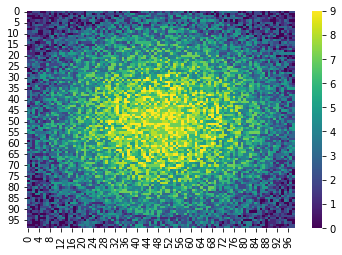

In [68]:
seaborn.heatmap(forest, cmap='viridis')

<AxesSubplot:>

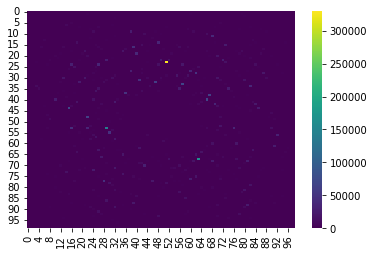

In [35]:
seaborn.heatmap(scenic, cmap='viridis')

Looks like that most scenic tree is a real outlier.